Bonus for SQL-challenge in Bootcamp class

To run this connection (and to avoid keeping a password in this notebook) remember to set your local OS
environment DATABASE_URL variable to look like this, filling in your own db password and db name.
Assumes your db user ID is postgres.  This assumes adding this line to your .zshrc in Mac environments:

    export DATABASE_URL="postgresql://<your db username>:<your db password>@localhost:5432/<your db>"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

In [3]:
# Define the engine string to be used for connecting to your EmployeeSQL using the environment
#   variable DATABASE_URL
database_url = os.environ.get('DATABASE_URL', 'postgresql://localhost:5432/EmployeeSQL')
# engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
engine = create_engine(database_url)
# connection = engine.connect()

In [4]:
# Read each table from EmployeeSQL database into a dataframe
departments_df = pd.read_sql_query('select * from departments',con=engine)
employees_df   = pd.read_sql_query('select * from employees',con=engine)
titles_df      = pd.read_sql_query('select * from titles',con=engine)
salaries_df    = pd.read_sql_query('select * from salaries',con=engine)
dept_emp_df    = pd.read_sql_query('select * from dept_emp',con=engine)
dept_manager_df= pd.read_sql_query('select * from dept_manager',con=engine)

In [5]:
# Replace the , and $ and .00 from 'salary' column (defined as 'money' in Postgres), convert to integer
salaries_df['salary'] = salaries_df['salary'].replace({'\$': '', ',': '', '\.00': ''}, regex=True).astype("int64")
salaries_df.dtypes

emp_no    int64
salary    int64
dtype: object

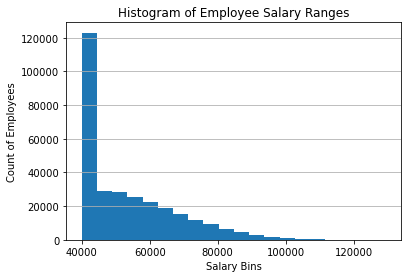

In [6]:
# Plot histogram of salary ranges
plt.hist(salaries_df["salary"], bins=20)
plt.title("Histogram of Employee Salary Ranges")
plt.xlabel("Salary Bins")
plt.ylabel("Count of Employees")
plt.grid(axis="y")
plt.savefig("Images/SalaryHistogram.png")
plt.show()

In [7]:
# join 3 dataframes to get relationship between salary and title, group by title and get average salary
salary_title_df = salaries_df.merge(employees_df, on="emp_no").merge(titles_df, left_on="emp_title_id", right_on="title_id")
avg_salary_df = salary_title_df[["title", "salary"]].groupby(by="title").mean()
avg_salary_df.head()

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704


In [8]:
# Undo the indexing of title so we can use it as an x column in plotting
avg_salary_df = avg_salary_df.reset_index()

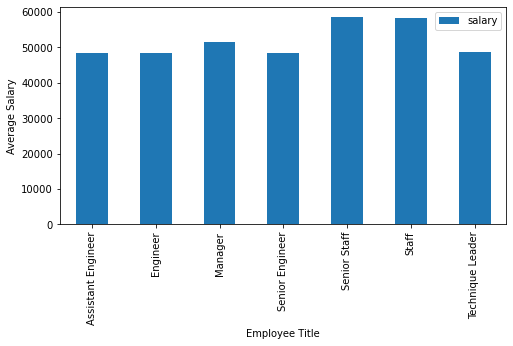

In [9]:
# Create a bar chart of average salary by title
avg_salary_df.plot.bar(x="title", y="salary", figsize=(8,4))
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")
plt.savefig("Images/AvgSalaryByTitle.png")
plt.show()